In [1]:
setwd('/import/metabolites/1600')

In [2]:
expr = read.table('./BMK_1_Control_vs_JD4/BMK_2_DEG_Cluster/Control_vs_JD4.txt',row.names = 1,sep = '\t',header =T)

In [3]:
expr1 = expr[,c(4,5,6)]

In [4]:
head(expr,2)

,Control.1,Control.2,Control.3,JD4.1,JD4.2,JD4.3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
evm.TU.scaffold520.10,1.360437,0.573533,1.271172,1.327511,6.895074,5.610351
evm.TU.scaffold1510.12,12.019589,8.107336,11.577633,14.151673,23.863295,24.401491


In [5]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 4.2.3"


In [6]:
meta = read_xlsx('./4vs3(1).xlsx')

In [7]:
meta1 = meta[,c('Name','Norm. Area: 4-4-1.raw (F10)','Norm. Area: 4-4-2.raw (F11)','Norm. Area: 4-4-3.raw (F12)')]

In [8]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
meta1 = meta1 %>% tibble::column_to_rownames(.,'Name') 

In [10]:
colnames(meta1) = colnames(expr1)

In [11]:
expr1 = as.data.frame(t(expr1))
meta1 = as.data.frame(t(meta1))

In [12]:
library(psych)#R包psych中的命令corr.test()提供了在计算变量间相关系数的同时执行显著性检验的方法。
merge_cor<- corr.test(expr1, meta1, method = 'pearson')

Warning message:
"package 'psych' was built under R version 4.2.3"
Warning message in cor(x, y, use = use, method = method):
"the standard deviation is zero"
Warning message in corr.test(expr1, meta1, method = "pearson"):
"Number of subjects must be greater than 3 to find confidence intervals."


In [15]:
#merge_cor.raw = merge_cor

In [90]:
merge_cor = merge_cor.raw
merge_cor$p[merge_cor$p >= 0.01] <- -1#筛选，例如在“merge_cor”中，根据 p(<0.05) 值和 r(>=0.5 or <=-0.5) 值做保留
merge_cor$p[merge_cor$p < 0.01 & merge_cor$p >= 0] <- 1
merge_cor$p[merge_cor$p == -1] <- 0
merge_cor$r[abs(merge_cor$r) < 0.8] <- 0
merge_cor_final <- merge_cor$r * merge_cor$p
merge_cor_final = na.omit(merge_cor_final)
#write.csv(merge_cor_final, 'merge_cor_final.csv', quote = FALSE)

In [91]:
a = merge_cor_final[which(rowSums(merge_cor_final) != 0),]

In [92]:
dim(a)

[1] 731  23

In [202]:
head(a,4)

,Cryptotanshinone,tanshinoneV,sibieiquinone A,17-hydroxytanshindiol B,isotanshinone 2A,3-hydroxymethylenetanshi nquinone,Tanshindiol C,norsalvioxide,Succinic acid,miltionone,...,(+)-Lithospermic acid,"Methyl 1,6-dimethyl-10,11-dioxo-1,2,6,7,8,9,10,11-octahydrophenanthro[1,2-b]furan-6-carboxylate","3-Hydroxy-2-isopropyl-8,8-dimethyl-5,6,7,8-tetrahydro-1,4-phenanthrenedione",Methyl tanshinonate,Tanshinon I,miltirone,"1,6-Dimethyl-1,2,8,9-tetrahydrophenanthro[1,2-b]furan-10,11-dione",Tanshinone IIA,microstegiol,salvinone
NewGene_774,0.0000000,0,0,0,0,0,0.0000000,0,0,0,...,0,0.0000000,0,-0.9999991,0,0,0,0.0000000,0,0
evm.TU.C207621.1,0.0000000,0,0,0,0,0,0.0000000,0,0,0,...,0,0.0000000,0,0.0000000,0,0,0,-0.9999982,0,0
NewGene_9213,-0.9999186,0,0,0,0,0,0.0000000,0,0,0,...,0,0.0000000,0,0.0000000,0,0,0,0.0000000,0,0
evm.TU.scaffold8469.2,0.0000000,0,0,0,0,0,0.9999608,0,0,0,...,0,-0.9999754,0,0.0000000,0,0,0,0.0000000,0,0


In [205]:
name = read.csv('./name.csv',header =F)

In [207]:
head(name,3)

,V1,V2
,<chr>,<chr>
1,cryptotanshinone,Cryptotanshinone
2,tanshinoneV,tanshinoneV
3,sibieiquinone A,sibieiquinone A


In [208]:
colnames(a) = name$V1

In [209]:
# https://www.coder.work/article/6614040

In [210]:
dev.off()

null device 
          1

In [211]:
options(repr.plot.width = 6,repr.plot.height = 9)

In [23]:

pdf('heatmap1.pdf',width = 6,height = 9)
library(corrplot)#使用corrplot包中的corrplot()命令对相关性数据进行可视化展示   
corrplot(a, method = 'number', number.cex = 0.5, diag = FALSE, tl.cex = 0.4)
corrplot(a, add = TRUE, type = 'upper', method = 'pie', diag = FALSE,
         tl.pos = 'n', cl.pos = 'n', tl.cex=2)
#corrplot(a, method = 'pie')#饼图
dev.off()

Warning message:
"package 'corrplot' was built under R version 4.2.3"
corrplot 0.92 loaded



png 
  2

In [96]:
write.csv(merge_cor_final,file = 'merge_cor_final.csv')

In [212]:
gene.ko  =read.table('./gene.ko.txt',header =T,sep = '\t')

In [213]:
gene = gene.ko$ID

In [214]:
merge_cor_final1 = a %>% as.data.frame 

In [215]:
merge_cor_final1 = merge_cor_final1[gene,] %>%  na.omit()

In [216]:
dim(merge_cor_final1)

[1] 54 23

In [217]:
keggid= read.table('./KEGG.txt',header =F,sep = '\t')

In [218]:
colnames(gene.ko)

[1] "ID"              "KEGG_annotation"

In [219]:
head(keggid,1)

,V1,V2,V3
,<chr>,<chr>,<chr>
1,K00864,glpK,ko04626


In [220]:
c = merge(gene.ko,keggid,by.x = 'KEGG_annotation',by.y = 'V1')

In [222]:
ko = c('ko04016','ko00904','ko04075','ko04626')

In [223]:
c1 = c[!duplicated(c$V2),] %>%  dplyr::filter(V3 %in%  ko) %>%  dplyr::select(ID,V2)

In [224]:
expr  = merge_cor_final1 %>% tibble::rownames_to_column('ID')

In [225]:
expr2 = left_join(c1,expr,by = 'ID') %>%  na.omit() 

In [226]:
rownames(expr2) = expr2[,2]
expr3 = expr2[,-c(1,2)]

In [235]:
library(tidyr)

Warning message:
"package 'tidyr' was built under R version 4.2.3"


In [236]:
expr4 = expr3 %>%  tibble::rownames_to_column(.,'gene')

In [244]:
table_long <- expr4 %>% 
  pivot_longer(cols = -gene, names_to = "metabolite", values_to = "cor") %>%  dplyr::filter(cor != 0)

In [245]:
head(table_long,2)

gene,metabolite,cor
<chr>,<chr>,<dbl>
E5.5.1.13,cryptotanshinone,-0.9999803
E4.2.3.19,sibieiquinone A,-0.9999829


In [246]:
write.csv(table_long,file = 'table_long.csv',quote = F,col.names = F,row.names = F)

Warning message in write.csv(table_long, file = "table_long.csv", quote = F, col.names = F, :
"attempt to set 'col.names' ignored"


In [228]:
library(pheatmap)

In [229]:
expr4 = expr3[,which(colSums(expr3) != 0)]

In [230]:
pmtout = expr4

In [231]:

    if(!is.null(pmtout)){
    ssmt <- pmtout< 0
    pmtout[ssmt] <- '**'
    smt <- pmtout > 0.01& pmtout < 1
    pmtout[smt] <- '**'
    pmtout[!ssmt&!smt]<- ''
    } else{
    pmtout <- F
    }

In [232]:
mycol<-colorRampPalette(c("blue","white","tomato"))(800)

png 
  2

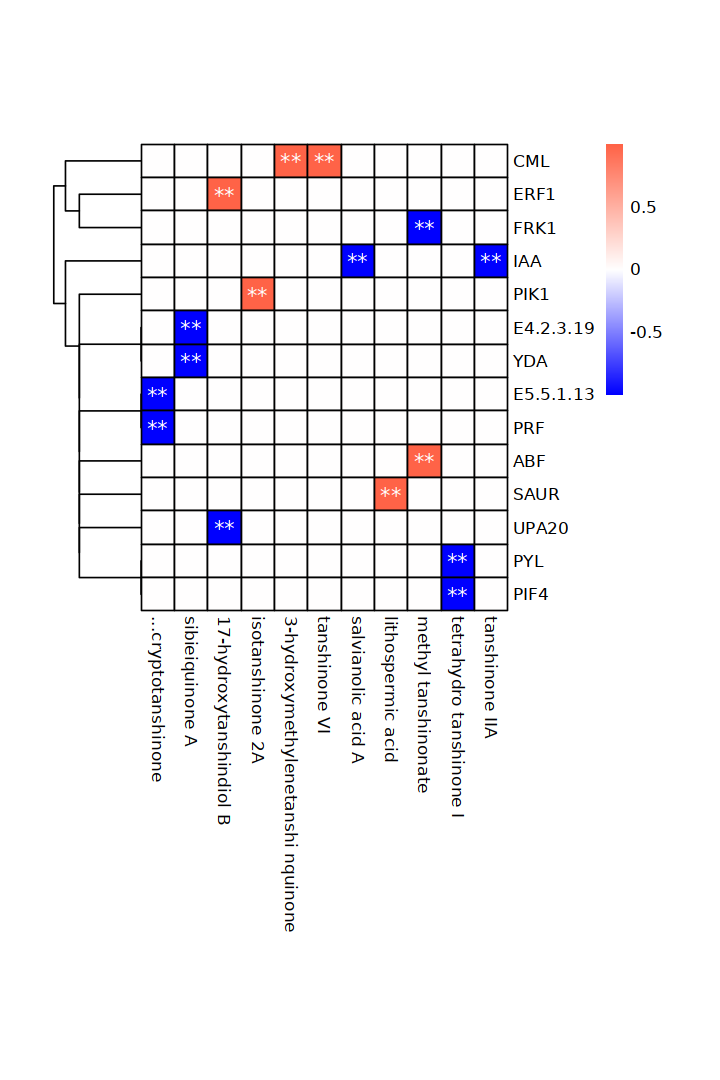

In [234]:
 p = pheatmap(expr4,scale = "none",cluster_row = T, cluster_col = F, border='black',
    fontsize_number = 12, number_color = "white",  display_numbers = pmtout,
    cellwidth = 20, cellheight =20,color=mycol)

pdf(paste0(ko,'.pdf'))
p
dev.off()